# Ejercicios Pair Programming 
## Lección 1 - Tratamiento para Machine Learning

Empezamos una nueva lección, y este es el momento de poner en práctica los conocimientos adquiridos sobre la Regresión Lineal Simple I. Para ello os vamos a pedir que por vuestra cuenta busqueis un dataset que os guste, por ejemplo de Kaggle o de donde queráis extraerlo. De forma que vamos a probar a realizar ajustes lineales con el fin de predecir alguna de sus variables. Este dataset será el que iremos usando a lo largo de todas las sesiones de pairprogramming de regresión lineal.

In [1]:
#Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer tamaño gráficas
plt.rcParams["figure.figsize"] = (10,10)

# Warning
import warnings
warnings.filterwarnings('ignore')

### Objetivos

Los objetivos de hoy son:

1.- Buscar un conjunto de datos a analizar:

Es necesario que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico. Ya que tambien se utilizarán serán útiles a la hora de realizar predicciones en las clases de regresión lineal múltiple. Así mismo se recomienda que los datasets esten ligeramente limpios para facilitar los análisis.


Hemos decidido utilizar un dataset facilitado por Kaggle que contiene datos de perfiles de clientes de compras en supermercados

In [2]:
# Cargamos el dataframe
df = pd.read_csv("superstore_data.csv", index_col=0)

In [116]:
pd.options.display.max_columns=None

In [3]:
# Visualizamos el dataframe con el parámetro head
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
Id,,,,,,,,,,,,,,,,,,,,,
1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,...,111,189,218,1,4,4,6,1,1,0
1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,...,7,0,37,1,7,3,7,5,1,0
10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,...,15,2,30,1,3,2,5,2,0,0
1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,...,0,0,0,1,1,0,2,7,0,0
5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,...,11,0,34,2,3,1,2,7,1,0


In [157]:
# Reseteamos el index ya que la columna title está como índice y la queremos como columna.
df.reset_index(inplace=True)

In [158]:
# Volvemos a visualizar el dataframe con el parámetro head
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0


Información de las columnas de nuestro Dataframe:

.- Id = número de cliente.

.- Year_Birth = año de nacimiento del cliente.

.- Education = nivel de estudios del cliente.

.- Marital_Status = estado civil del cliente.

.- Income = ingresos anuales del cliente.

.- Kidhome = presencia de niños en casa.

.- Teenhome = presencia de adolescentes en casa.

.- Dt_Customer = fecha de compra.

.- Recency = frecuencia de compra.

.- MntWines	= cantidad de vinos en compra.

.- MntFruits = cantidad de frutas en compra.

.- MntMeatProducts = cantidad de carnes en compra.

.- MntFishProducts = cantidad de pescados en compra.

.- MntSweetProducts = cantidad de dulces en compra.

.- MntGoldProds = cantidad de alta gama en compra.

.- NumDealsPurchases = número de ofertas.

.- NumWebPurchases = número de compras en web.

.- NumCatalogPurchases = número de compras por catálogo

.- NumStorePurchases = número de compras en tienda física.

.- NumWebVisitsMonth = número de visitas por mes en web.

.- Response	= respuestas en compras.

.- Complain = quejas en compras.

In [159]:
# Nos creamos una copia del dataframe originial para realizar la limpieza y así tener el original por si hay algún problema
df_limpio = df.copy()

In [160]:
# Eliminamos columnas que no nos interesan en nuestro análisis
df_limpio.drop(["Kidhome","Teenhome","Recency","MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","Response","Complain","NumCatalogPurchases","MntGoldProds"], axis=1, inplace=True)

Eliminamos estas columnas por diferentes razones. Algunas de ellas no nos proporcionan los datos de la manera que consideramos más adecuada para nuestro estudio y a otras no les vemos relación directa con nuestra variable respuesta (número de compras online).

In [161]:
df_limpio.head()

,Id,Year_Birth,Education,Marital_Status,Income,Dt_Customer,NumDealsPurchases,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth
0,1826,1970,Graduation,Divorced,84835.0,6/16/2014,1,4,6,1
1,1,1961,Graduation,Single,57091.0,6/15/2014,1,7,7,5
2,10476,1958,Graduation,Married,67267.0,5/13/2014,1,3,5,2
3,1386,1967,Graduation,Together,32474.0,11/5/2014,1,1,2,7
4,5371,1989,Graduation,Single,21474.0,8/4/2014,2,3,2,7


2.- Explicar los datos y las variables disponibles en el conjunto de datos seleccionado:

Esto se hace para que comprendais mejor los datos con los que estais trabajando.

Realizar un EDA sencillo para la variable dependiente y la variable independiente.

### EDA

In [163]:
# Vemos la dimensión de nuestro dataframe. Tiene un total de 2240 filas y 10 columnas.
df_limpio.shape

(2240, 10)

In [164]:
# Vemos las columnas de nuestro dataframe.
df_limpio.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Dt_Customer', 'NumDealsPurchases', 'NumWebPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')

In [166]:
# Vemos de manera más general el tipo de datos y nulos que tiene nuestro dataframe.
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 2240 non-null   int64  
 1   Year_Birth         2240 non-null   int64  
 2   Education          2240 non-null   object 
 3   Marital_Status     2240 non-null   object 
 4   Income             2216 non-null   float64
 5   Dt_Customer        2240 non-null   object 
 6   NumDealsPurchases  2240 non-null   int64  
 7   NumWebPurchases    2240 non-null   int64  
 8   NumStorePurchases  2240 non-null   int64  
 9   NumWebVisitsMonth  2240 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 175.1+ KB


In [167]:
# Visualizamos los principales estadísticos de las columnas numéricas.
df_limpio.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
NumDealsPurchases,2240.0,2.325000,1.932238,0.0,1.00,2.0,3.00,15.0
NumWebPurchases,2240.0,4.084821,2.778714,0.0,2.00,4.0,6.00,27.0
NumStorePurchases,2240.0,5.790179,3.250958,0.0,3.00,5.0,8.00,13.0
NumWebVisitsMonth,2240.0,5.316518,2.426645,0.0,3.00,6.0,7.00,20.0


In [168]:
# Visualizamos los principales estadísticos de las columnas categóricas.
df_limpio.describe(include="object").T

,count,unique,top,freq
Education,2240,5,Graduation,1127
Marital_Status,2240,8,Married,864
Dt_Customer,2240,663,8/31/2012,12


In [169]:
# Visualizamos los nulos de nuestro dataframe.
df_limpio.isnull().sum()

Id                    0
Year_Birth            0
Education             0
Marital_Status        0
Income               24
Dt_Customer           0
NumDealsPurchases     0
NumWebPurchases       0
NumStorePurchases     0
NumWebVisitsMonth     0
dtype: int64

In [170]:
# Eliminamos dichos nulos ya que no nos sirve para nuestro análisis y son relativamente pocas comparado con las filas que tiene
# nuestro dataframe.
df_limpio.dropna(inplace=True)

In [171]:
df_limpio.isnull().sum()

Id                   0
Year_Birth           0
Education            0
Marital_Status       0
Income               0
Dt_Customer          0
NumDealsPurchases    0
NumWebPurchases      0
NumStorePurchases    0
NumWebVisitsMonth    0
dtype: int64

In [172]:
# Visualizmos los duplicados de nuestro dataframe.
df_limpio.duplicated().sum()

0

In [174]:
df_limpio.shape

(2216, 10)

#### Detección de Outliers y tratamiento de los mismos

In [175]:
# Creamos un dataframe para las columnas numéricas.
numericas = df_limpio.select_dtypes(include=np.number)
numericas.head(2)

,Id,Year_Birth,Income,NumDealsPurchases,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth
0,1826,1970,84835.0,1,4,6,1
1,1,1961,57091.0,1,7,7,5


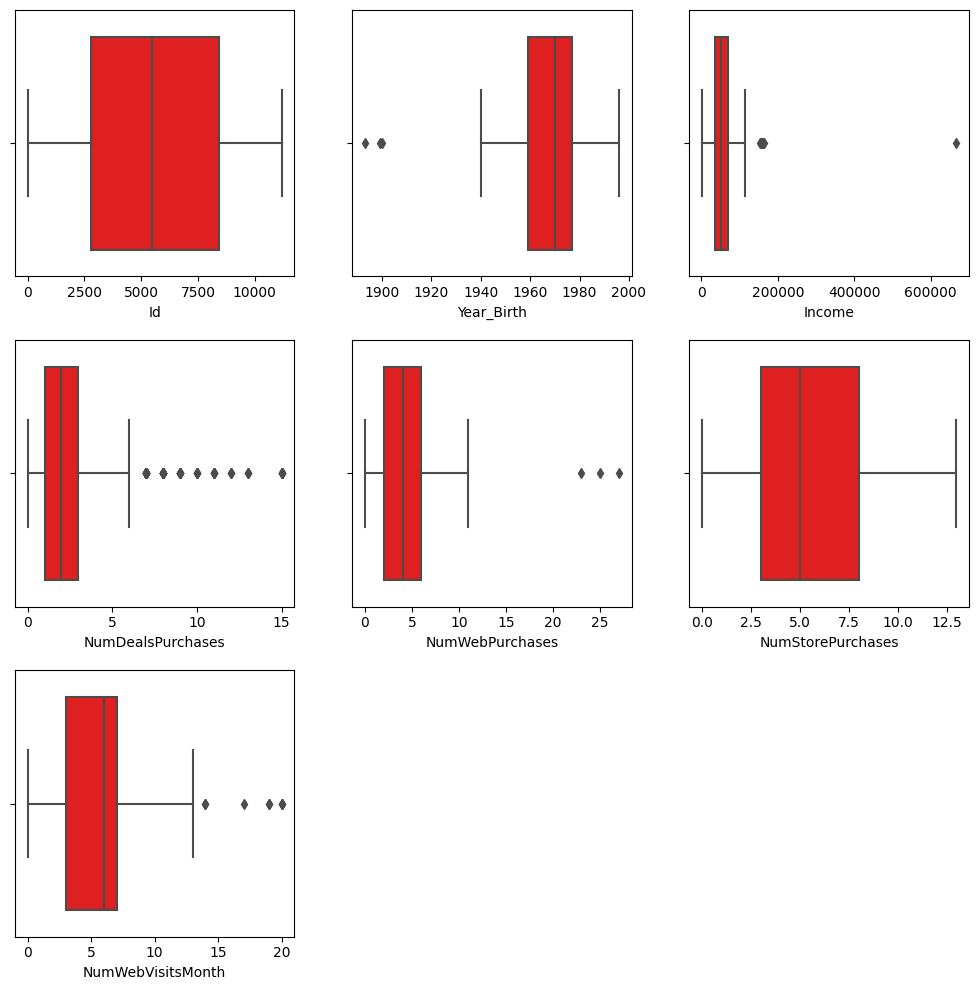

In [178]:
# Visualizamos nuestros outliers de las columnas numéricas a través de la visualización con boxplots.

fig, axes = plt.subplots(3, 3, figsize=(10,10))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df_limpio, ax=axes[indice], color = "red"); # para trazar una línea de densidad

    
plt.tight_layout()
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])

plt.show()

Nos encontramos diferentes outliers en nuestro dataframe:

.- En la columna "year birth" (año de nacimiento) = Nos aparecen dos outliers nacidos en 1900 que consideramos para nuestro estudio que pueden ser eliminados.

.- En la columna "income" (ingresos) = vemos que nos aparecen dos outliers que están por encima de los ingresos normales de los compradores, por tanto, en nuestro análisis los eliminariamos.

.- En la columna "NumDealsPursaches" (compras con ofertas) =vemos que nos aparecen varias outliers que podriamos reemplazarlos por la mediana.

.- En la columna "NumWebPursaches" (compras en web) =vemos que nos aparecen tres outliers de un total de mas de 2000 filas, por lo tanto, consideramos que se pueden eliminar.

.- En la columna "NumWebVisitsMonth" (numero de visitas al mes) =vemos que nos aparecen varias outliers que podriamos reemplazarlos por la mediana.


In [179]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index))
        

    
    return dicc_indices 

In [180]:
lista_columnas = list(numericas.columns)
ind = detectar_outliers(lista_columnas, df_limpio)

In [181]:
ind.items()

dict_items([('Year_Birth', [513, 827, 2233]), ('Income', [325, 497, 527, 731, 853, 1826, 1925, 2204]), ('NumDealsPurchases', [26, 27, 64, 105, 106, 127, 226, 251, 263, 269, 273, 334, 400, 471, 493, 497, 512, 555, 583, 584, 604, 661, 663, 708, 713, 714, 850, 860, 902, 942, 944, 961, 995, 1033, 1047, 1072, 1077, 1111, 1158, 1162, 1164, 1169, 1172, 1193, 1242, 1262, 1266, 1267, 1282, 1314, 1315, 1332, 1361, 1362, 1377, 1391, 1407, 1416, 1448, 1457, 1466, 1524, 1562, 1563, 1586, 1588, 1635, 1640, 1686, 1718, 1819, 1840, 1845, 1847, 1974, 1975, 1997, 2034, 2039, 2080, 2134, 2135, 2204, 2218]), ('NumWebPurchases', [14, 210, 2063]), ('NumWebVisitsMonth', [60, 456, 663, 1291, 1416, 1466, 1533, 1721])])

##### Eliminamos los outliers de las columnas "Year_Birth", "Income" y "NumWebPurchases" que hemos explicado anteriormente

In [182]:
df_limpio.drop([513, 827, 2233], axis=0, inplace=True)
df_limpio.drop([325, 497, 527, 731, 853, 1826, 1925, 2204], axis=0, inplace=True)
df_limpio.drop([14, 210, 2063], axis=0, inplace=True)

##### Reemplazamos por la mediana las columnas "NumCatalogPurchases" y "NumWebVisitsMonth" que hemos explicado anteriormente

In [183]:
ind = detectar_outliers(lista_columnas, df_limpio)

In [184]:
ind.items()

dict_items([('NumDealsPurchases', [26, 27, 64, 105, 106, 127, 226, 251, 263, 269, 273, 334, 400, 471, 493, 512, 555, 583, 584, 604, 661, 663, 708, 713, 714, 850, 860, 902, 942, 944, 961, 995, 1033, 1047, 1072, 1077, 1111, 1158, 1162, 1164, 1169, 1172, 1193, 1242, 1262, 1266, 1267, 1282, 1314, 1315, 1332, 1361, 1362, 1377, 1391, 1407, 1416, 1448, 1457, 1466, 1524, 1562, 1563, 1586, 1588, 1635, 1640, 1686, 1718, 1819, 1840, 1845, 1847, 1974, 1975, 1997, 2034, 2039, 2080, 2134, 2135, 2218]), ('NumWebVisitsMonth', [60, 456, 663, 1291, 1416, 1466, 1533, 1721])])

In [185]:
# hacemos un for loop para iterar por el diccionario y acceder a las columnas y filas 
# y reemplazar los valores por la media y mediana.

for k, v in ind.items():
    median = df_limpio[k].median()
    for i in v:
        df.loc[i,k] = median 

##### Visualizamos con bloxpots nuestro tratamiento de outliers

In [187]:
# Sobreescribimos el dataframe para las columnas numéricas.
numericas = df_limpio.select_dtypes(include=np.number)

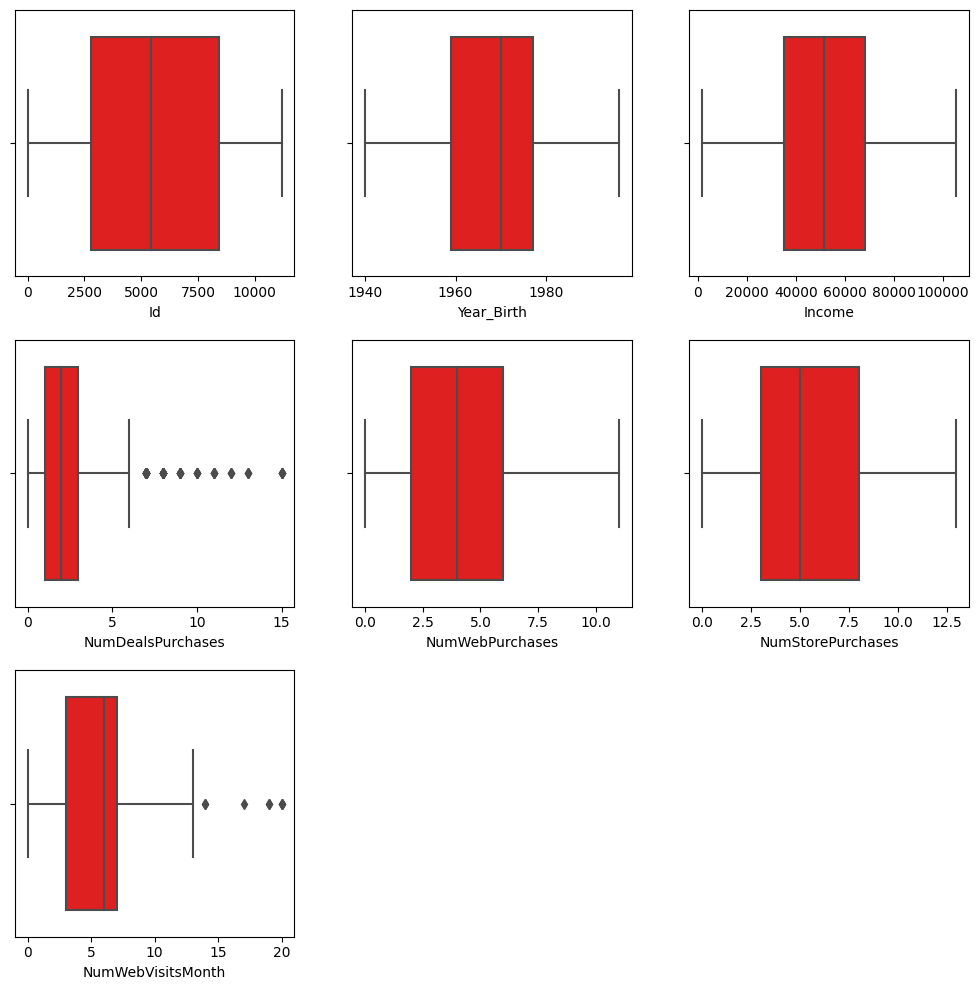

In [188]:
fig, axes = plt.subplots(3, 3, figsize=(10,10))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df_limpio, ax=axes[indice], color = "red"); 

    
plt.tight_layout()
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])

plt.show()

Con esta visualización vemos que hemos tratado todos nuestros outliers. En el caso de "NumDealsPurchases" y "NumWebVisitsMonth" vemos que hay nuevos outliers ya que la mediana ha cambiado de valor.

#### Limpieza de dataframe (cambio de columnas a minusculas)

In [189]:
# Cambiamos el nombre de las columnas en minuscula todo.
columnas_nuevas = {col:col.lower() for col in df_limpio.columns}
df_limpio.rename(columns=columnas_nuevas, inplace=True)
df_limpio.head(2)

,id,year_birth,education,marital_status,income,dt_customer,numdealspurchases,numwebpurchases,numstorepurchases,numwebvisitsmonth
0,1826,1970,Graduation,Divorced,84835.0,6/16/2014,1,4,6,1
1,1,1961,Graduation,Single,57091.0,6/15/2014,1,7,7,5


### Variable respuesta

Hemos decidido que queremos predecir el número de compras que tienen los compradores de las demás variables independientes. Por tanto, nuestra variable respuesta sería "numwebpurchases".

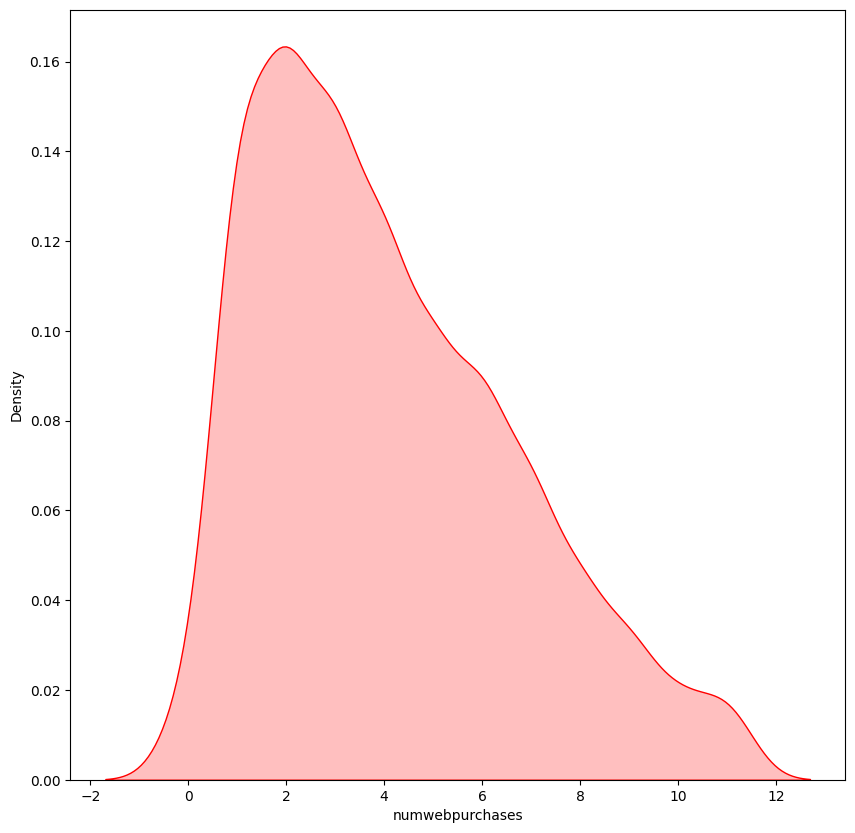

In [190]:
# vamos a ver visualmente como está distribuida la variable respuesta.

sns.distplot(
    df_limpio["numwebpurchases"], 
    hist = False, 
    color = "red", 
    kde_kws = {"shade": True, "linewidth": 1});

Con la visualización de la gráfica distplot podemos ver la distribución y densidad de nuestra variable respuesta. En esta gráfica lo que podemos apreciar es que la distribución no es normal ya que no presenta una campana de Gauss.

### Variables Predictoras

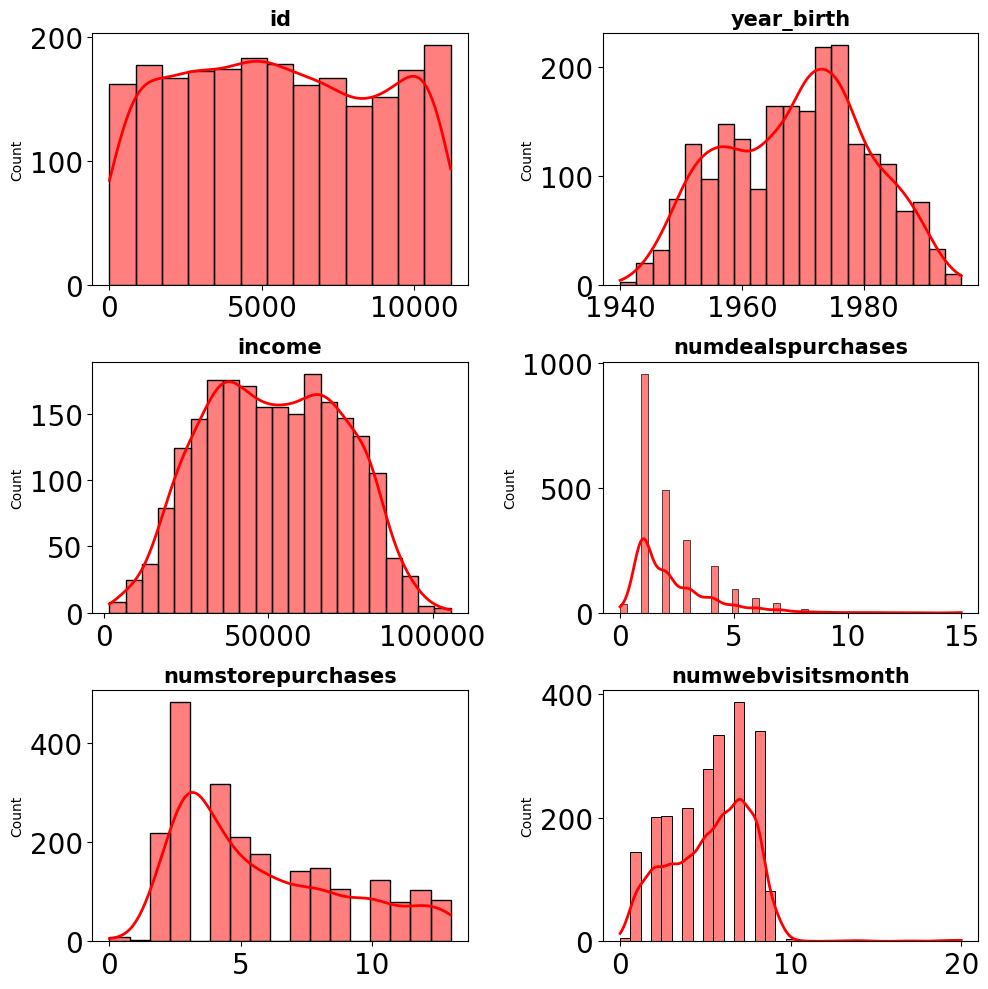

In [194]:
# Creaos un suplots con gráficas de barras para ver la distribución de datos de nuestras variables numéricas.

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (10, 10))


axes = axes.flat

columnas_numeric = df_limpio.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("numwebpurchases")

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df_limpio,
        x = colum,
        kde = True, 
        color = "red", 
        line_kws = {"linewidth": 2}, # para indicar el ancho de las líneas de las barras
        alpha = 0.5, # para especificar la transparencia del color
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout();

Podemos apreciar en estas gráficas de barra que la distribución de nuestras variables numéricas no presenta distribución normal. 

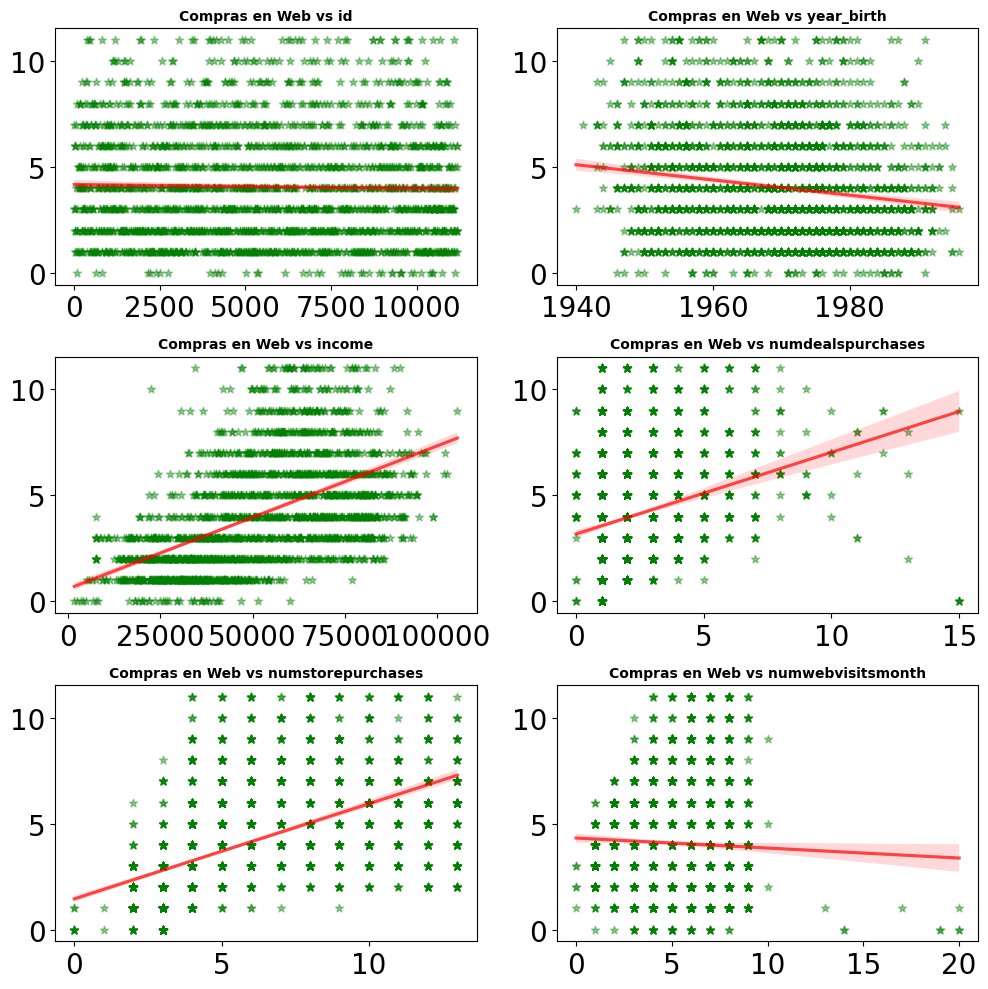

In [196]:
# Creamos un subplots para ver la relación a través de la gráfica regplot entre nuestra variable respuesta
# y las variables predictoras.


fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (10, 10))


axes = axes.flat

columnas_numeric = df_limpio.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("numwebpurchases")

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df_limpio[colum], 
        y = df_limpio["numwebpurchases"], 
        color = "green", 
        marker = "*", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Compras en Web vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout();

En esta gráfica ya si podemos ver la relación directa entre nuestra variable respuesta con las variables predictoras. Un ejemplo de la relación podría ser "Compras en Web(numwebpurchases) vs Ingresos(income)". En esa gráfica podemos ver que a más ingresos mayores compras en web. Por otro lado, en "Compras en Web(numwebpurchases) vs Año de Nacimiento(year_birth)" observamos que a mayor edad mayor número de compras online.

##### Gráfica de Correlación de las variables numéricas

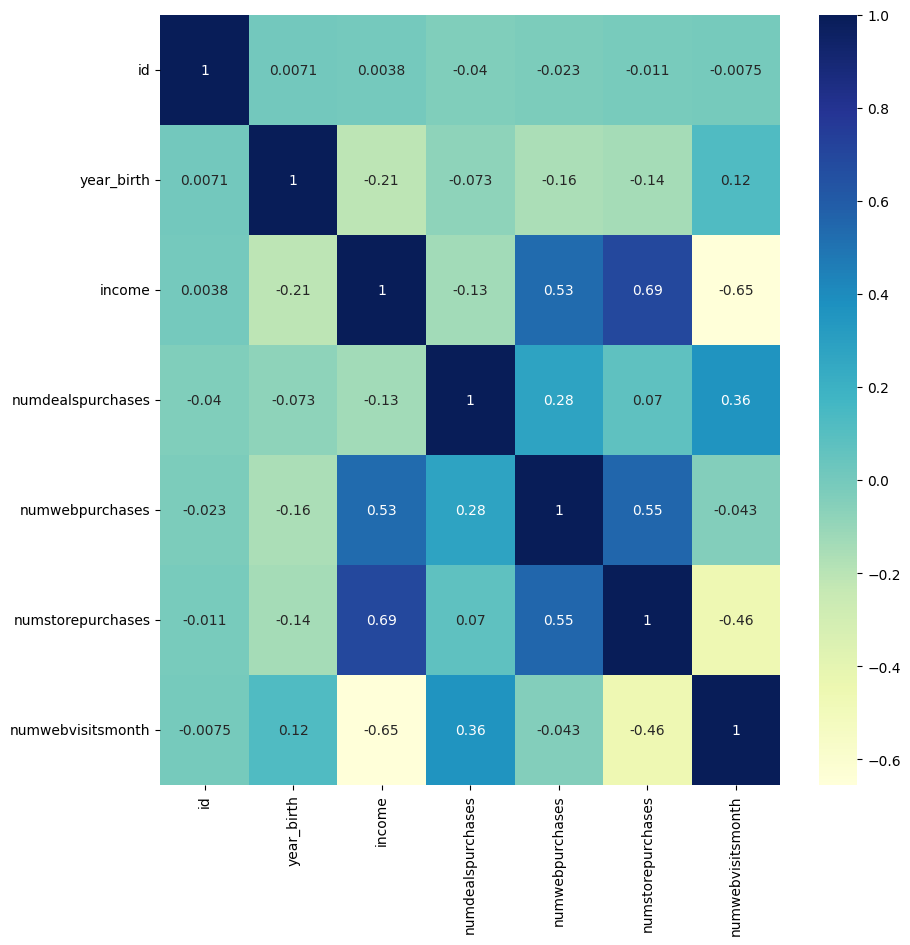

In [197]:
sns.heatmap(df_limpio.corr(), 
           cmap = "YlGnBu", 
           annot = True);

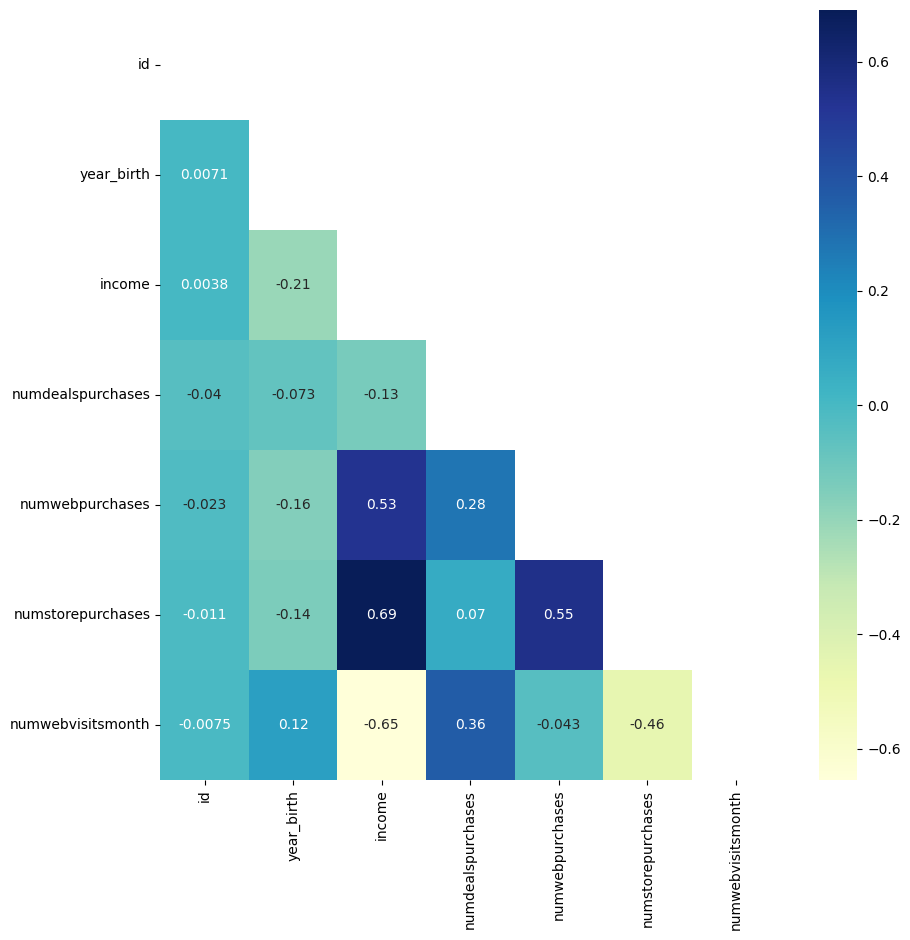

In [198]:
# Sacamos solo una diagonal para verlo más claro, ya que en la gráfica anterior vemos las cosas repetidas.

mask = np.triu(np.ones_like(df_limpio.corr(), dtype = np.bool))

sns.heatmap(df_limpio.corr(), 
           cmap = "YlGnBu", 
            mask = mask,
           annot = True);

Al igual que en el gráfico regplot podemos ver aquí la correlación entre nuestras variables numéricas. Si vemos la relación entre "numwebpurchases vs income" vemos que nos presenta el valor de 0.53, eso quiere decir que es una correlación positiva moderada, es decir, a más ingresos más compras por web. En el caso de "numwebpurchases vs year_bith" vemos que presenta un valor de -0.16, eso quiere decir que es una correlacion negativa débil, es decir, a menor compras en web mayor es tu año de nacimiento.

In [199]:
df_limpio.head()

,id,year_birth,education,marital_status,income,dt_customer,numdealspurchases,numwebpurchases,numstorepurchases,numwebvisitsmonth
0,1826,1970,Graduation,Divorced,84835.0,6/16/2014,1,4,6,1
1,1,1961,Graduation,Single,57091.0,6/15/2014,1,7,7,5
2,10476,1958,Graduation,Married,67267.0,5/13/2014,1,3,5,2
3,1386,1967,Graduation,Together,32474.0,11/5/2014,1,1,2,7
4,5371,1989,Graduation,Single,21474.0,8/4/2014,2,3,2,7


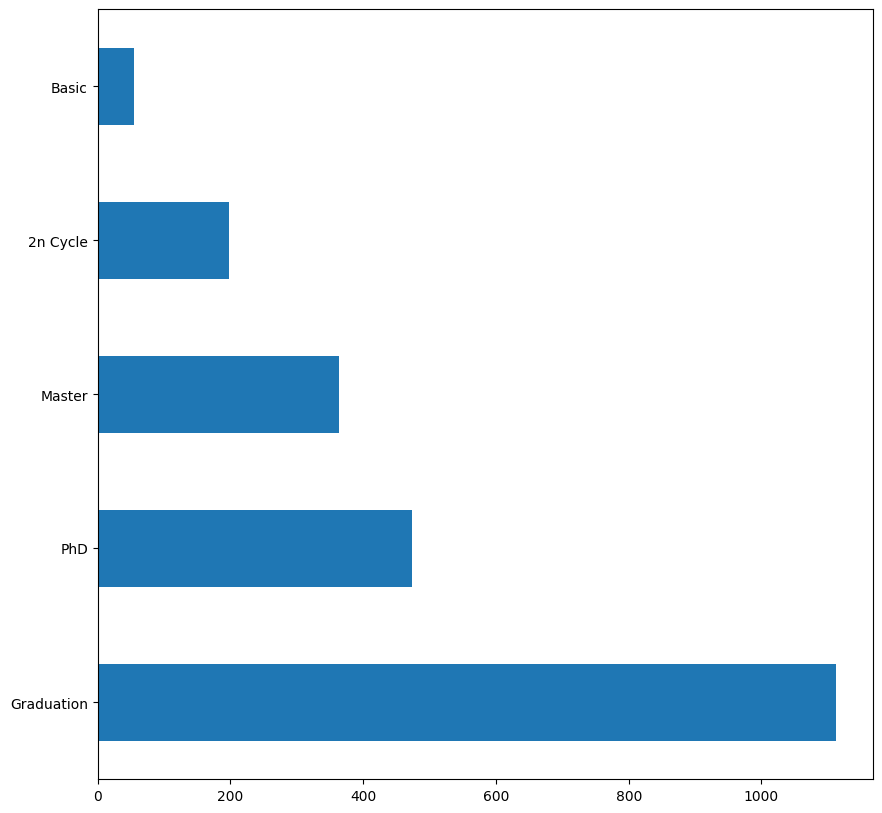

In [200]:
# Creamos gráficos ahora para las columnas categóricas. En este caso aunque hay tres columnas categóricas
# solo realizaremos gráficos para la columna "education" y "marital_status", que son las que de manera gráfica podemos
# visualizar sin problemas.

df_limpio["education"].value_counts().plot.barh();

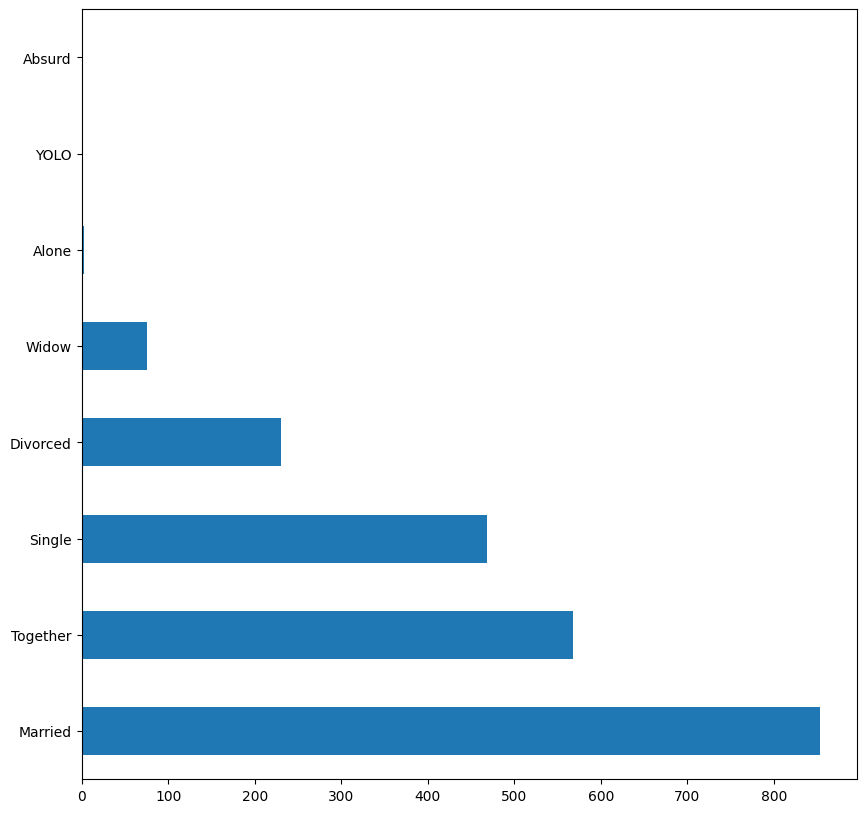

In [201]:
df_limpio["marital_status"].value_counts().plot.barh();

Visualizando las dos gráficas vemos que en la de "education" las compras son realizadas más por graduados, mientras que en la columna "marital_status" vemos que las compras son realizadas más por casados.

In [202]:
df_limpio.to_csv("supermercado_limpio.csv")

Happy coding 📊📈📉